## **Assignment 1**
Intructions for the assignment: [link](https://daniel-yukimura.github.io/ipcv-2020-assignment-1/)

### **Part 1: Google Colab Setup**

Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

1. Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.


2. You can use command line instructions like `ls` and `cd` to find the folder that this notebook is stored. Move to this folder by changing the code below to access your folder:

3. If you're using python scripts together with your implementation we recommend using the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

### **Part 2: PyTorch Tensors**

As instructed in class we'll be using PyTorch in all throught the semester, for more information check the assignment instructions page and the references provided.

1. Start by importing and checking PyTorch version. In case you're running locally, you must be sure to have [installed](https://pytorch.org/get-started/locally/) the latest version in a proper environment.

In [1]:
import torch
print(torch.__version__)

1.6.0


In [2]:
# Example
# 2x2 tensor built from a regular array
T = torch.tensor( [ [1,2], [3, 4] ] )
print(T)

T_row = T[0,:]
T_cln = T[:,0]
T_e =   T[0,0].item()
print(T[0,0], T_e)
 
print(T.dtype)
print(T.size())

tensor([[1, 2],
        [3, 4]])
tensor(1) 1
torch.int64
torch.Size([2, 2])


2. Run the example above, or a similar one, but experiment using the functions: `torch.Tensor`, `torch.as_tensor` and `torch.empty` when creating tensors. You should also check `torch.set_default_dtype` and experiment with it. See [doc](https://pytorch.org/docs/stable/torch.html#)
3. You must check for differences in how PyTorch handles memory and data type.
4. Write on markdown or as a comment a brief comment on what is the difference between using those or the standard `torch.tensor`.

In [3]:
##############################################################################
# Code for 2-4.
##############################################################################

T2 = torch.tensor( [ [8,9], [10, 11] ] )
print(T2)
print(T2.dtype)
print(T2.size())

print('----------------')

T3 = [[5,6], [7, 8]]
T3 =  torch.as_tensor(T3)
print(T3)
print(T3.dtype)
print(T3.size())

print('----------------')

T4 = torch.empty(5,3)
print(T4)
print(T4.dtype)
print(T4.size())


tensor([[ 8,  9],
        [10, 11]])
torch.int64
torch.Size([2, 2])
----------------
tensor([[5, 6],
        [7, 8]])
torch.int64
torch.Size([2, 2])
----------------
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32
torch.Size([5, 3])


5. Write a function that receives a 2D tensor as input and returns a tensor of same size that is 
- equal to the input on the first row
- 2 times the input's second row on the second row
- 3 times the input's third row on the third row
- etc..

For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

6. You must use tensor operations to do so, which means no loops.
  **Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

7. *Extra*: You can also implement a simpler version using loops and simple indexing, and then compare the two functions using `times` for large tensors (ex: `torch.ones(1000,500)`).

In [4]:
##############################################################################
# Code for 5-7.
##############################################################################
def mult_tensor(t):
    print('Original tensor \n{}'.format(t))
    t_copy = t
    for i in list(torch.arange(t.size()[0])):
        #print(i)
        #print(t_copy[i, :])
        #print(torch.mul(t[i], i+1))
        t_copy[i, :] = torch.mul(t[i], i+1)
        #print('-----')
    return t_copy
    
t = torch.full((4, 8), 2.0)

mult_tensor(t)

Original tensor 
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.]])


tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])

For the following parts you'll practice how to train and evaluate a neural network trained on MNIST.

### **Part 3: Handling Data**

**MNIST**, is a famous dataset containing 70,000 grayscale hand-written digits (0-9) and their associated values. PyTorch `torchvision.dataset` gives us access to a few datasets including this one. The dataset is divided as 60,000 training images and 10,000 for the test set.

Using MNIST you should construct a neural network classifier that can predict the digits in an image.


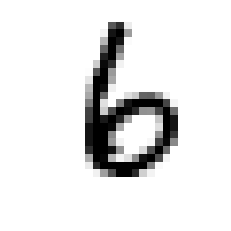

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST

#example
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,)) ])
mnist_data = MNIST(os.getcwd(), download=True, transform=mnist_transform)

image, label = mnist_data.__getitem__(2020)
plt.imshow(  image.view(28,28).numpy(), cmap = 'gray_r' )
plt.axis('off')
plt.show()

1. Now you must create a train-test-val split. 
  * First check [here](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist) to know how to get a train-test split. Then use `random_split` to break your train set in a ratio [55000, 5000]. 
  * Create their respective loaders using `DataLoader`.
  * Create a function that receives a batch of images and can plot them in a organized manner. Check [here](https://matplotlib.org/3.3.1/tutorials/index.html).
  * Check the size of the datasets, as well as the shape of the images.
  * Check how balanced each dataset split is: You can use `torch.bincount` feature.

In [6]:
##############################################################################
# Code for 1.
##############################################################################

random_seed = 2020
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

batch_size_train = 64
batch_size_test = 1000

def MNIST_train_test_val_split(dataset):
    # train and val set
    train_set, val_set = torch.utils.data.random_split(dataset, [55000, 5000])
    # test data
    test_set = MNIST(os.getcwd(), download=True, transform=mnist_transform, train=False)
    
    # Dataloaders
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size_train, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size_train, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_test, shuffle=True)
    return train_loader, val_loader, test_loader

In [7]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,)) ])

# download the dataset
dataset = MNIST(os.getcwd(), download=True, transform=mnist_transform, train=True)
    
train_loader, val_loader, test_loader = MNIST_train_test_val_split(dataset)

##################
train_loader
torch.Size([64, 1, 28, 28])
tensor([ 6, 11, 12,  6,  7,  2,  4,  7,  4,  5])


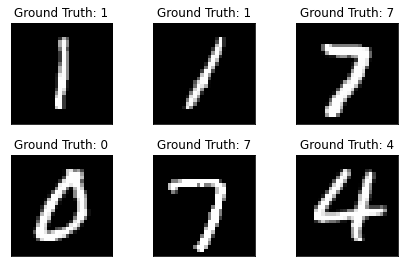

##################
test_loader
torch.Size([1000, 1, 28, 28])
tensor([ 87, 114, 113,  99, 104,  93,  94, 102,  92, 102])


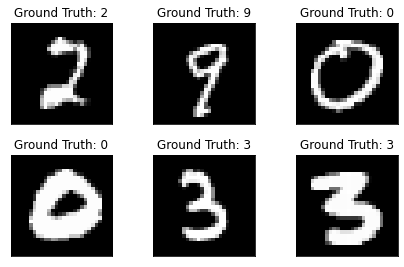

##################
val_loader
torch.Size([64, 1, 28, 28])
tensor([ 7,  8,  6,  3,  8,  6,  5,  5, 10,  6])


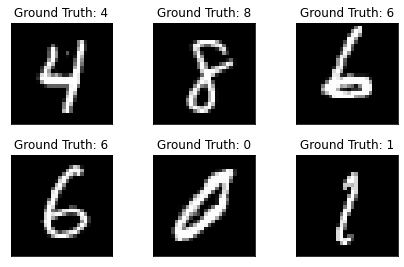

In [8]:
def plot_imgs(df_loader):
    examples = enumerate(df_loader)
    batch_idx, (example_data, example_targets) = next(examples)
    
    # check the shape
    print(example_data.shape)
    
    #frequency of label in training sample
    print(torch.bincount(example_targets))
        
    
    # plot the imgs    
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
        plt.title("Ground Truth: {}".format(example_targets[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show(fig)

print('##################')
print('train_loader')
plot_imgs(train_loader)
print('##################')
print('test_loader')
plot_imgs(test_loader)
print('##################')
print('val_loader')
plot_imgs(val_loader)


2. Using `torch.nn` define a two layers feedforward neural network with a ReLU activation. The network must receive the image in its original shape, and reshape it in order to pass throught the linear layers.

In [9]:
##############################################################################
# Code for 2.
##############################################################################
import torch.nn as nn

class TwoLayersNN(nn.Module):
    def __init__(self, dim_in, dim_hidden, dim_out):
        super(TwoLayersNN, self).__init__()
        
        self.linear1 = nn.Linear(dim_in, dim_hidden)
        self.act = nn.ReLU()
        self.linear2 = nn.Linear(dim_hidden, dim_out)

    def forward(self, x):
        h = self.linear1(x)
        h = self.act(h)
        y = self.linear2(h)
        return y

3. Using the `CrossEntropyLoss` loss function you must set a SGD optimizer and train your network on the MNIST for at least 10 epochs. You should set a print statement or a progress bar to print your training loss.

4. Test your model in your test dataset. Remember to use `torch.no_grad`.

5. Change your learning rate and batch size one or two times to observe how the test performance varies.

In [10]:
##############################################################################
# Code for 3-5.
##############################################################################

import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.01
momentum = 0.9
n_epochs = 10
log_interval = 10

train_losses = []
train_counter = []

x, y = dataset.__getitem__(0)

dim_in, dim_hidden, dim_out = x.size(1)*x.size(2), 100, 10
model = TwoLayersNN(dim_in, dim_hidden, dim_out)

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

def train(train_loader, epoch):
    model.train() # put model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        pred = model(data.view(data.size(0), -1))
        loss =  F.cross_entropy(pred, torch.tensor(target))
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
            
def predict(test_loader):
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            output = model(data.view(data.size(0), -1))
            fig = plt.figure()
            for i in range(6):
                plt.subplot(2,3,i+1)
                plt.tight_layout()
                plt.imshow(data[i][0], cmap='gray', interpolation='none')
                plt.title("Prediction: {}".format( output.data.max(1, keepdim=True)[1][i].item()))
                plt.xticks([])
                plt.yticks([])
            plt.show(fig)

Train Epoch: 1 [0/55000 (0%)]	Loss: 2.318223
Train Epoch: 1 [640/55000 (1%)]	Loss: 1.683281
Train Epoch: 1 [1280/55000 (2%)]	Loss: 0.980267
Train Epoch: 1 [1920/55000 (3%)]	Loss: 0.577634
Train Epoch: 1 [2560/55000 (5%)]	Loss: 0.607572
Train Epoch: 1 [3200/55000 (6%)]	Loss: 0.403554
Train Epoch: 1 [3840/55000 (7%)]	Loss: 0.275708
Train Epoch: 1 [4480/55000 (8%)]	Loss: 0.823247
Train Epoch: 1 [5120/55000 (9%)]	Loss: 0.375956
Train Epoch: 1 [5760/55000 (10%)]	Loss: 0.419940
Train Epoch: 1 [6400/55000 (12%)]	Loss: 0.351089
Train Epoch: 1 [7040/55000 (13%)]	Loss: 0.208174
Train Epoch: 1 [7680/55000 (14%)]	Loss: 0.249448
Train Epoch: 1 [8320/55000 (15%)]	Loss: 0.245528
Train Epoch: 1 [8960/55000 (16%)]	Loss: 0.279400
Train Epoch: 1 [9600/55000 (17%)]	Loss: 0.382090
Train Epoch: 1 [10240/55000 (19%)]	Loss: 0.194314
Train Epoch: 1 [10880/55000 (20%)]	Loss: 0.285823
Train Epoch: 1 [11520/55000 (21%)]	Loss: 0.640294
Train Epoch: 1 [12160/55000 (22%)]	Loss: 0.206225
Train Epoch: 1 [12800/55000 (

Train Epoch: 2 [51840/55000 (94%)]	Loss: 0.031847
Train Epoch: 2 [52480/55000 (95%)]	Loss: 0.067490
Train Epoch: 2 [53120/55000 (97%)]	Loss: 0.021097
Train Epoch: 2 [53760/55000 (98%)]	Loss: 0.308600
Train Epoch: 2 [54400/55000 (99%)]	Loss: 0.073228
Train Epoch: 3 [0/55000 (0%)]	Loss: 0.072866
Train Epoch: 3 [640/55000 (1%)]	Loss: 0.104673
Train Epoch: 3 [1280/55000 (2%)]	Loss: 0.127263
Train Epoch: 3 [1920/55000 (3%)]	Loss: 0.051569
Train Epoch: 3 [2560/55000 (5%)]	Loss: 0.115393
Train Epoch: 3 [3200/55000 (6%)]	Loss: 0.025837
Train Epoch: 3 [3840/55000 (7%)]	Loss: 0.126475
Train Epoch: 3 [4480/55000 (8%)]	Loss: 0.022830
Train Epoch: 3 [5120/55000 (9%)]	Loss: 0.167368
Train Epoch: 3 [5760/55000 (10%)]	Loss: 0.182183
Train Epoch: 3 [6400/55000 (12%)]	Loss: 0.124474
Train Epoch: 3 [7040/55000 (13%)]	Loss: 0.145255
Train Epoch: 3 [7680/55000 (14%)]	Loss: 0.084759
Train Epoch: 3 [8320/55000 (15%)]	Loss: 0.109631
Train Epoch: 3 [8960/55000 (16%)]	Loss: 0.037313
Train Epoch: 3 [9600/55000 (

Train Epoch: 4 [48640/55000 (88%)]	Loss: 0.019674
Train Epoch: 4 [49280/55000 (90%)]	Loss: 0.032570
Train Epoch: 4 [49920/55000 (91%)]	Loss: 0.055552
Train Epoch: 4 [50560/55000 (92%)]	Loss: 0.056067
Train Epoch: 4 [51200/55000 (93%)]	Loss: 0.067169
Train Epoch: 4 [51840/55000 (94%)]	Loss: 0.010791
Train Epoch: 4 [52480/55000 (95%)]	Loss: 0.100099
Train Epoch: 4 [53120/55000 (97%)]	Loss: 0.052489
Train Epoch: 4 [53760/55000 (98%)]	Loss: 0.096046
Train Epoch: 4 [54400/55000 (99%)]	Loss: 0.028815
Train Epoch: 5 [0/55000 (0%)]	Loss: 0.009459
Train Epoch: 5 [640/55000 (1%)]	Loss: 0.033459
Train Epoch: 5 [1280/55000 (2%)]	Loss: 0.034501
Train Epoch: 5 [1920/55000 (3%)]	Loss: 0.011037
Train Epoch: 5 [2560/55000 (5%)]	Loss: 0.040816
Train Epoch: 5 [3200/55000 (6%)]	Loss: 0.034733
Train Epoch: 5 [3840/55000 (7%)]	Loss: 0.016455
Train Epoch: 5 [4480/55000 (8%)]	Loss: 0.024195
Train Epoch: 5 [5120/55000 (9%)]	Loss: 0.073957
Train Epoch: 5 [5760/55000 (10%)]	Loss: 0.086348
Train Epoch: 5 [6400/55

Train Epoch: 6 [44800/55000 (81%)]	Loss: 0.008707
Train Epoch: 6 [45440/55000 (83%)]	Loss: 0.040329
Train Epoch: 6 [46080/55000 (84%)]	Loss: 0.011563
Train Epoch: 6 [46720/55000 (85%)]	Loss: 0.049330
Train Epoch: 6 [47360/55000 (86%)]	Loss: 0.022752
Train Epoch: 6 [48000/55000 (87%)]	Loss: 0.015350
Train Epoch: 6 [48640/55000 (88%)]	Loss: 0.033668
Train Epoch: 6 [49280/55000 (90%)]	Loss: 0.128313
Train Epoch: 6 [49920/55000 (91%)]	Loss: 0.125398
Train Epoch: 6 [50560/55000 (92%)]	Loss: 0.048912
Train Epoch: 6 [51200/55000 (93%)]	Loss: 0.032628
Train Epoch: 6 [51840/55000 (94%)]	Loss: 0.008496
Train Epoch: 6 [52480/55000 (95%)]	Loss: 0.020378
Train Epoch: 6 [53120/55000 (97%)]	Loss: 0.025458
Train Epoch: 6 [53760/55000 (98%)]	Loss: 0.027478
Train Epoch: 6 [54400/55000 (99%)]	Loss: 0.063297
Train Epoch: 7 [0/55000 (0%)]	Loss: 0.021383
Train Epoch: 7 [640/55000 (1%)]	Loss: 0.010302
Train Epoch: 7 [1280/55000 (2%)]	Loss: 0.060783
Train Epoch: 7 [1920/55000 (3%)]	Loss: 0.105283
Train Epoch:

Train Epoch: 8 [41600/55000 (76%)]	Loss: 0.052003
Train Epoch: 8 [42240/55000 (77%)]	Loss: 0.058037
Train Epoch: 8 [42880/55000 (78%)]	Loss: 0.026404
Train Epoch: 8 [43520/55000 (79%)]	Loss: 0.018005
Train Epoch: 8 [44160/55000 (80%)]	Loss: 0.009552
Train Epoch: 8 [44800/55000 (81%)]	Loss: 0.008782
Train Epoch: 8 [45440/55000 (83%)]	Loss: 0.005182
Train Epoch: 8 [46080/55000 (84%)]	Loss: 0.006267
Train Epoch: 8 [46720/55000 (85%)]	Loss: 0.087604
Train Epoch: 8 [47360/55000 (86%)]	Loss: 0.010250
Train Epoch: 8 [48000/55000 (87%)]	Loss: 0.011469
Train Epoch: 8 [48640/55000 (88%)]	Loss: 0.009321
Train Epoch: 8 [49280/55000 (90%)]	Loss: 0.024141
Train Epoch: 8 [49920/55000 (91%)]	Loss: 0.005831
Train Epoch: 8 [50560/55000 (92%)]	Loss: 0.051535
Train Epoch: 8 [51200/55000 (93%)]	Loss: 0.078625
Train Epoch: 8 [51840/55000 (94%)]	Loss: 0.025347
Train Epoch: 8 [52480/55000 (95%)]	Loss: 0.021756
Train Epoch: 8 [53120/55000 (97%)]	Loss: 0.022566
Train Epoch: 8 [53760/55000 (98%)]	Loss: 0.107721


Train Epoch: 10 [36480/55000 (66%)]	Loss: 0.008349
Train Epoch: 10 [37120/55000 (67%)]	Loss: 0.041318
Train Epoch: 10 [37760/55000 (69%)]	Loss: 0.018814
Train Epoch: 10 [38400/55000 (70%)]	Loss: 0.041569
Train Epoch: 10 [39040/55000 (71%)]	Loss: 0.011807
Train Epoch: 10 [39680/55000 (72%)]	Loss: 0.013537
Train Epoch: 10 [40320/55000 (73%)]	Loss: 0.008672
Train Epoch: 10 [40960/55000 (74%)]	Loss: 0.006254
Train Epoch: 10 [41600/55000 (76%)]	Loss: 0.017183
Train Epoch: 10 [42240/55000 (77%)]	Loss: 0.084803
Train Epoch: 10 [42880/55000 (78%)]	Loss: 0.009970
Train Epoch: 10 [43520/55000 (79%)]	Loss: 0.039679
Train Epoch: 10 [44160/55000 (80%)]	Loss: 0.066295
Train Epoch: 10 [44800/55000 (81%)]	Loss: 0.289833
Train Epoch: 10 [45440/55000 (83%)]	Loss: 0.001308
Train Epoch: 10 [46080/55000 (84%)]	Loss: 0.013362
Train Epoch: 10 [46720/55000 (85%)]	Loss: 0.032185
Train Epoch: 10 [47360/55000 (86%)]	Loss: 0.011823
Train Epoch: 10 [48000/55000 (87%)]	Loss: 0.007452
Train Epoch: 10 [48640/55000 (8

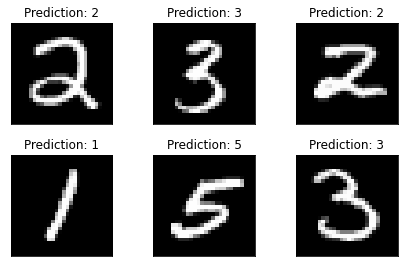

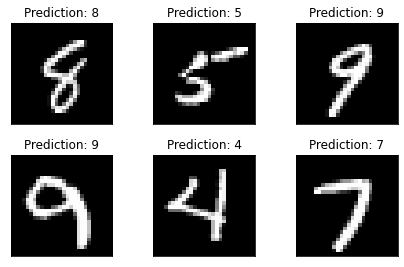

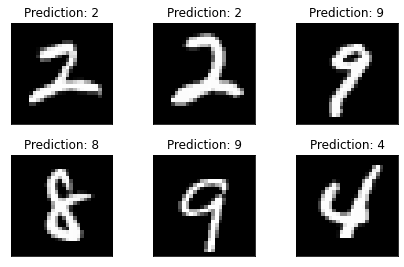

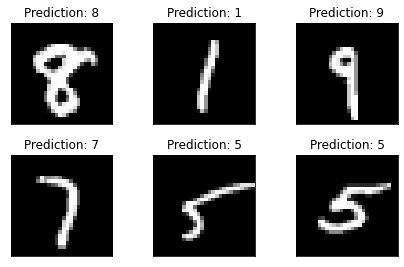

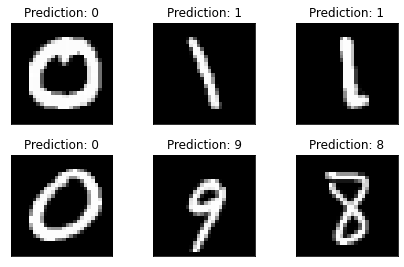

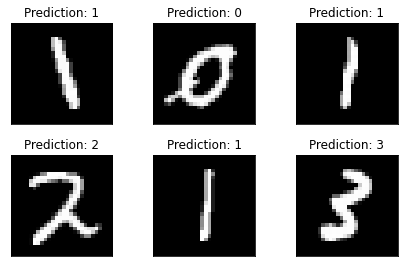

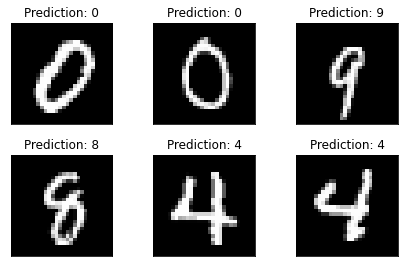

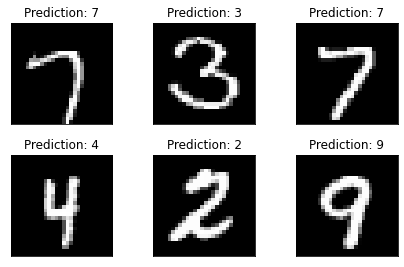

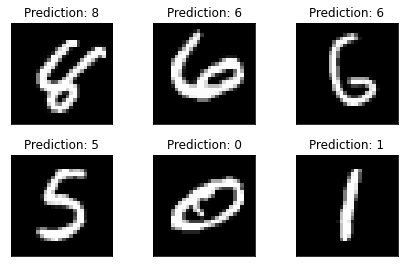

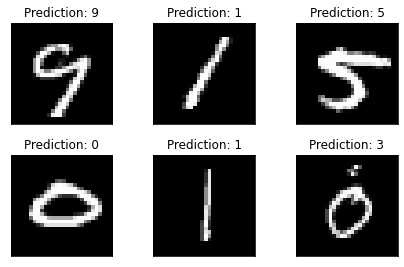

In [11]:
import warnings
warnings.filterwarnings('ignore')

for epoch in range(1, n_epochs + 1):
    train(train_loader, epoch)

predict(test_loader)

In [12]:
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

device

device(type='cuda', index=0)

6. Next, change the runtime of colab for running with the GPU and modify your code to run in the gpu.

7. Add a validation step in your training loop, saving your validation loss throughout the training. After the training plot the curve of the progress of this validation loss.

8. Add an accuracy measure in the validation loop. You might have to modify your model in order to get the logit values, then you can use `torch.argmax` to obtain the labels predicted, which you must them compare with the true labels. Plot the evolution of the accuracy.


In [13]:
##############################################################################
# Code for 6-8.
##############################################################################

import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.01
momentum = 0.9
n_epochs = 10
log_interval = 10

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(val_loader.dataset) for i in range(n_epochs)]# + 1)]
acc_evolution = []

x, y = dataset.__getitem__(0)

dim_in, dim_hidden, dim_out = x.size(1)*x.size(2), 100, 10
model = TwoLayersNN(dim_in, dim_hidden, dim_out)

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)


def train(train_loader, epoch):
    model.train() # put model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        pred = model(data.view(data.size(0), -1))
        loss =  F.cross_entropy(pred, torch.tensor(target))
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    
            
def predict(test_loader):
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            output = model(data.view(data.size(0), -1))
            fig = plt.figure()
            for i in range(6):
                plt.subplot(2,3,i+1)
                plt.tight_layout()
                plt.imshow(data[i][0], cmap='gray', interpolation='none')
                plt.title("Prediction: {}".format( output.data.max(1, keepdim=True)[1][i].item()))
                plt.xticks([])
                plt.yticks([])
            plt.show(fig)
            
def test(val_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data.view(data.size(0), -1))
            test_loss += F.cross_entropy(output, torch.tensor(target))
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(val_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(val_loader.dataset), 
        100. * correct / len(val_loader.dataset)))
    acc_evolution.append(100. * correct / len(val_loader.dataset))
                    

def plot_val_loss():
    # plot validation loss
    fig = plt.figure()
    #plt.plot(train_counter, train_losses, color='blue')
    plt.plot(test_counter, test_losses, color='red')
    plt.title('Val Loss')
    plt.legend(['Val Loss', 'Test Loss'], loc='upper right')
    plt.xlabel('number of Val examples seen')
    plt.ylabel('cross_entropy loss')
    plt.show(fig)
    
def plot_acc():
    # plot accuracy
    fig = plt.figure()
    plt.plot(acc_evolution, color='red')
    plt.title('Accuracy')
    plt.legend(['Accuracy'], loc='upper right')
    plt.ylim(min(acc_evolution)-5, 100)
    plt.xlabel('Batch')
    plt.ylabel('Acc %')
    plt.show(fig)

In [14]:
import warnings
warnings.filterwarnings('ignore')

for epoch in range(1, n_epochs + 1):
    train(train_loader, epoch)
    test(val_loader)

Train Epoch: 1 [0/55000 (0%)]	Loss: 2.365520
Train Epoch: 1 [640/55000 (1%)]	Loss: 1.730988
Train Epoch: 1 [1280/55000 (2%)]	Loss: 0.906321
Train Epoch: 1 [1920/55000 (3%)]	Loss: 0.733472
Train Epoch: 1 [2560/55000 (5%)]	Loss: 0.609612
Train Epoch: 1 [3200/55000 (6%)]	Loss: 0.349524
Train Epoch: 1 [3840/55000 (7%)]	Loss: 0.524195
Train Epoch: 1 [4480/55000 (8%)]	Loss: 0.498953
Train Epoch: 1 [5120/55000 (9%)]	Loss: 0.316990
Train Epoch: 1 [5760/55000 (10%)]	Loss: 0.233389
Train Epoch: 1 [6400/55000 (12%)]	Loss: 0.376116
Train Epoch: 1 [7040/55000 (13%)]	Loss: 0.191539
Train Epoch: 1 [7680/55000 (14%)]	Loss: 0.157142
Train Epoch: 1 [8320/55000 (15%)]	Loss: 0.446979
Train Epoch: 1 [8960/55000 (16%)]	Loss: 0.298175
Train Epoch: 1 [9600/55000 (17%)]	Loss: 0.301350
Train Epoch: 1 [10240/55000 (19%)]	Loss: 0.351457
Train Epoch: 1 [10880/55000 (20%)]	Loss: 0.413342
Train Epoch: 1 [11520/55000 (21%)]	Loss: 0.159527
Train Epoch: 1 [12160/55000 (22%)]	Loss: 0.188092
Train Epoch: 1 [12800/55000 (

Train Epoch: 2 [50560/55000 (92%)]	Loss: 0.058514
Train Epoch: 2 [51200/55000 (93%)]	Loss: 0.099417
Train Epoch: 2 [51840/55000 (94%)]	Loss: 0.081159
Train Epoch: 2 [52480/55000 (95%)]	Loss: 0.075101
Train Epoch: 2 [53120/55000 (97%)]	Loss: 0.114860
Train Epoch: 2 [53760/55000 (98%)]	Loss: 0.130278
Train Epoch: 2 [54400/55000 (99%)]	Loss: 0.093989

Test set: Avg. loss: 0.0021, Accuracy: 4809/5000 (96%)

Train Epoch: 3 [0/55000 (0%)]	Loss: 0.070126
Train Epoch: 3 [640/55000 (1%)]	Loss: 0.043543
Train Epoch: 3 [1280/55000 (2%)]	Loss: 0.116688
Train Epoch: 3 [1920/55000 (3%)]	Loss: 0.024870
Train Epoch: 3 [2560/55000 (5%)]	Loss: 0.059318
Train Epoch: 3 [3200/55000 (6%)]	Loss: 0.052035
Train Epoch: 3 [3840/55000 (7%)]	Loss: 0.050231
Train Epoch: 3 [4480/55000 (8%)]	Loss: 0.036124
Train Epoch: 3 [5120/55000 (9%)]	Loss: 0.085605
Train Epoch: 3 [5760/55000 (10%)]	Loss: 0.087435
Train Epoch: 3 [6400/55000 (12%)]	Loss: 0.058887
Train Epoch: 3 [7040/55000 (13%)]	Loss: 0.073244
Train Epoch: 3 [76

Train Epoch: 4 [44800/55000 (81%)]	Loss: 0.034911
Train Epoch: 4 [45440/55000 (83%)]	Loss: 0.060550
Train Epoch: 4 [46080/55000 (84%)]	Loss: 0.020908
Train Epoch: 4 [46720/55000 (85%)]	Loss: 0.009382
Train Epoch: 4 [47360/55000 (86%)]	Loss: 0.077443
Train Epoch: 4 [48000/55000 (87%)]	Loss: 0.114507
Train Epoch: 4 [48640/55000 (88%)]	Loss: 0.045269
Train Epoch: 4 [49280/55000 (90%)]	Loss: 0.061775
Train Epoch: 4 [49920/55000 (91%)]	Loss: 0.021143
Train Epoch: 4 [50560/55000 (92%)]	Loss: 0.104038
Train Epoch: 4 [51200/55000 (93%)]	Loss: 0.038734
Train Epoch: 4 [51840/55000 (94%)]	Loss: 0.039552
Train Epoch: 4 [52480/55000 (95%)]	Loss: 0.080508
Train Epoch: 4 [53120/55000 (97%)]	Loss: 0.114527
Train Epoch: 4 [53760/55000 (98%)]	Loss: 0.028022
Train Epoch: 4 [54400/55000 (99%)]	Loss: 0.131099

Test set: Avg. loss: 0.0016, Accuracy: 4841/5000 (97%)

Train Epoch: 5 [0/55000 (0%)]	Loss: 0.052883
Train Epoch: 5 [640/55000 (1%)]	Loss: 0.106864
Train Epoch: 5 [1280/55000 (2%)]	Loss: 0.053757
Tra

Train Epoch: 6 [39680/55000 (72%)]	Loss: 0.040672
Train Epoch: 6 [40320/55000 (73%)]	Loss: 0.048325
Train Epoch: 6 [40960/55000 (74%)]	Loss: 0.067908
Train Epoch: 6 [41600/55000 (76%)]	Loss: 0.019929
Train Epoch: 6 [42240/55000 (77%)]	Loss: 0.044766
Train Epoch: 6 [42880/55000 (78%)]	Loss: 0.006123
Train Epoch: 6 [43520/55000 (79%)]	Loss: 0.071217
Train Epoch: 6 [44160/55000 (80%)]	Loss: 0.017306
Train Epoch: 6 [44800/55000 (81%)]	Loss: 0.086607
Train Epoch: 6 [45440/55000 (83%)]	Loss: 0.006736
Train Epoch: 6 [46080/55000 (84%)]	Loss: 0.050768
Train Epoch: 6 [46720/55000 (85%)]	Loss: 0.012081
Train Epoch: 6 [47360/55000 (86%)]	Loss: 0.019785
Train Epoch: 6 [48000/55000 (87%)]	Loss: 0.023194
Train Epoch: 6 [48640/55000 (88%)]	Loss: 0.124517
Train Epoch: 6 [49280/55000 (90%)]	Loss: 0.060711
Train Epoch: 6 [49920/55000 (91%)]	Loss: 0.016582
Train Epoch: 6 [50560/55000 (92%)]	Loss: 0.057081
Train Epoch: 6 [51200/55000 (93%)]	Loss: 0.018355
Train Epoch: 6 [51840/55000 (94%)]	Loss: 0.023153


Train Epoch: 8 [34560/55000 (63%)]	Loss: 0.005912
Train Epoch: 8 [35200/55000 (64%)]	Loss: 0.065032
Train Epoch: 8 [35840/55000 (65%)]	Loss: 0.040884
Train Epoch: 8 [36480/55000 (66%)]	Loss: 0.083329
Train Epoch: 8 [37120/55000 (67%)]	Loss: 0.028907
Train Epoch: 8 [37760/55000 (69%)]	Loss: 0.053473
Train Epoch: 8 [38400/55000 (70%)]	Loss: 0.044752
Train Epoch: 8 [39040/55000 (71%)]	Loss: 0.055351
Train Epoch: 8 [39680/55000 (72%)]	Loss: 0.046170
Train Epoch: 8 [40320/55000 (73%)]	Loss: 0.011245
Train Epoch: 8 [40960/55000 (74%)]	Loss: 0.023197
Train Epoch: 8 [41600/55000 (76%)]	Loss: 0.005912
Train Epoch: 8 [42240/55000 (77%)]	Loss: 0.039036
Train Epoch: 8 [42880/55000 (78%)]	Loss: 0.065835
Train Epoch: 8 [43520/55000 (79%)]	Loss: 0.035364
Train Epoch: 8 [44160/55000 (80%)]	Loss: 0.022713
Train Epoch: 8 [44800/55000 (81%)]	Loss: 0.083501
Train Epoch: 8 [45440/55000 (83%)]	Loss: 0.041245
Train Epoch: 8 [46080/55000 (84%)]	Loss: 0.024782
Train Epoch: 8 [46720/55000 (85%)]	Loss: 0.026116


Train Epoch: 10 [28160/55000 (51%)]	Loss: 0.043602
Train Epoch: 10 [28800/55000 (52%)]	Loss: 0.021245
Train Epoch: 10 [29440/55000 (53%)]	Loss: 0.013338
Train Epoch: 10 [30080/55000 (55%)]	Loss: 0.004508
Train Epoch: 10 [30720/55000 (56%)]	Loss: 0.007230
Train Epoch: 10 [31360/55000 (57%)]	Loss: 0.015428
Train Epoch: 10 [32000/55000 (58%)]	Loss: 0.012603
Train Epoch: 10 [32640/55000 (59%)]	Loss: 0.057910
Train Epoch: 10 [33280/55000 (60%)]	Loss: 0.028682
Train Epoch: 10 [33920/55000 (62%)]	Loss: 0.008406
Train Epoch: 10 [34560/55000 (63%)]	Loss: 0.018405
Train Epoch: 10 [35200/55000 (64%)]	Loss: 0.013665
Train Epoch: 10 [35840/55000 (65%)]	Loss: 0.034275
Train Epoch: 10 [36480/55000 (66%)]	Loss: 0.029544
Train Epoch: 10 [37120/55000 (67%)]	Loss: 0.066207
Train Epoch: 10 [37760/55000 (69%)]	Loss: 0.021053
Train Epoch: 10 [38400/55000 (70%)]	Loss: 0.118014
Train Epoch: 10 [39040/55000 (71%)]	Loss: 0.009209
Train Epoch: 10 [39680/55000 (72%)]	Loss: 0.026989
Train Epoch: 10 [40320/55000 (7

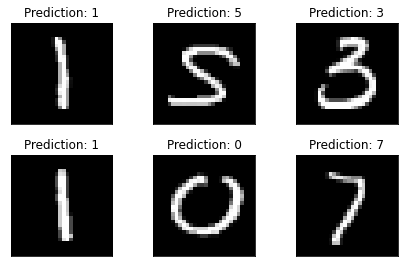

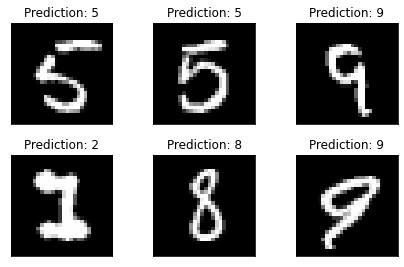

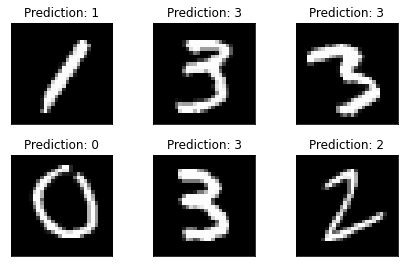

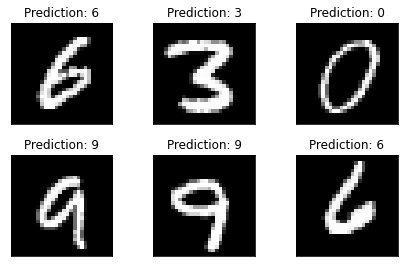

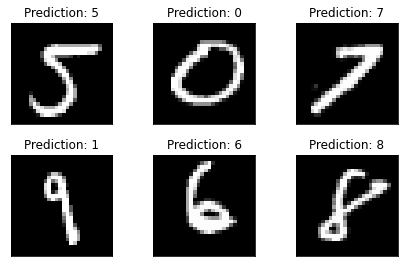

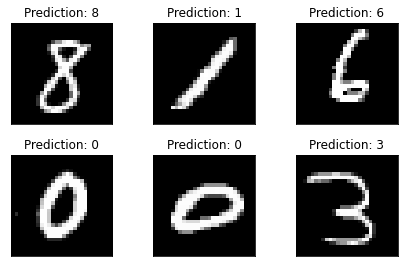

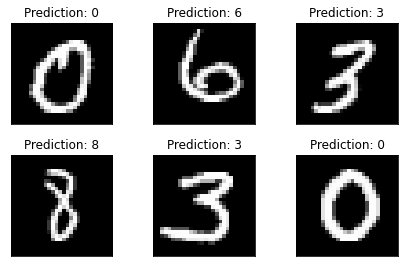

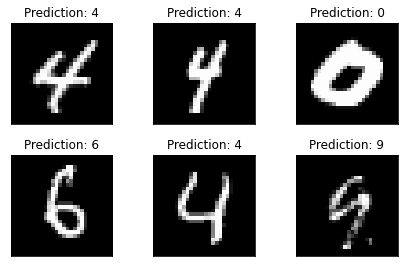

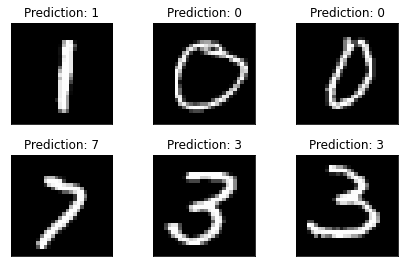

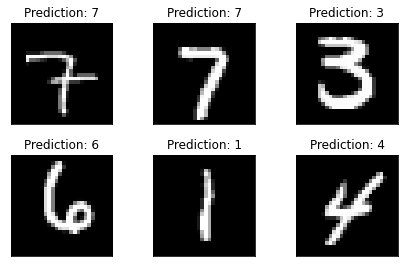

In [15]:
predict(test_loader)

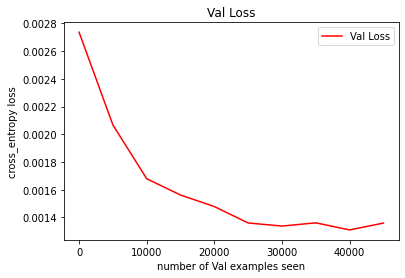

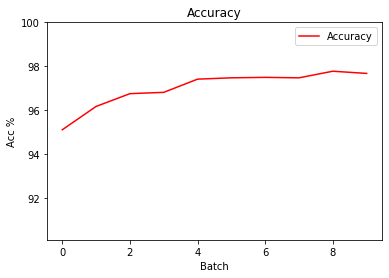

In [16]:
plot_val_loss()

plot_acc()

9. **[EXTRA]** Plot the confusion matrix for your result model. I suggest using [Seaborn](https://seaborn.pydata.org/). And evaluate the performance of your model.

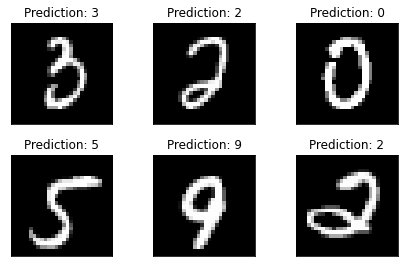

Confusion matrix, without normalization


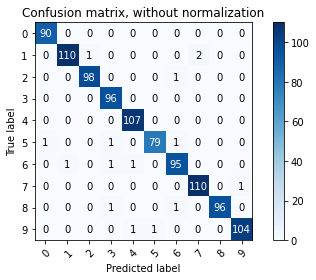

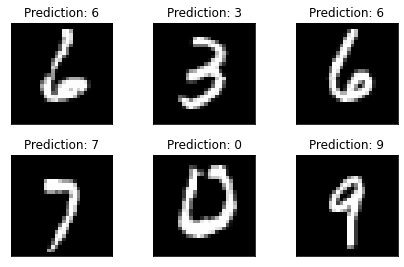

Confusion matrix, without normalization


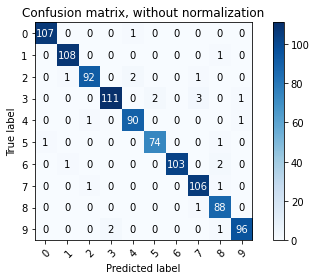

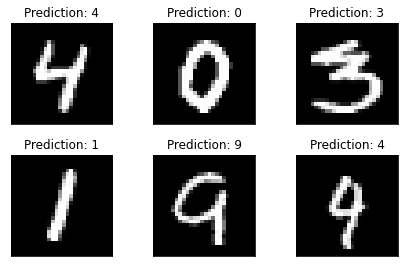

Confusion matrix, without normalization


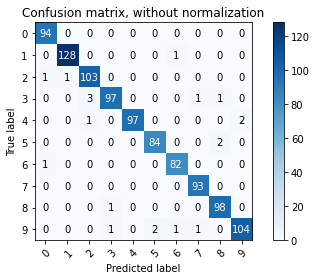

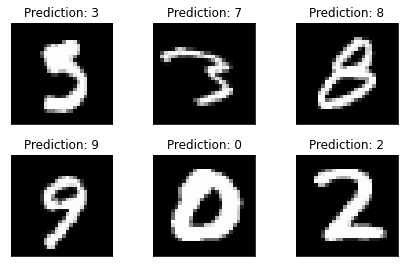

Confusion matrix, without normalization


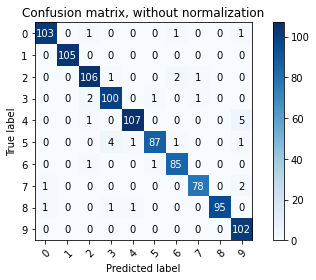

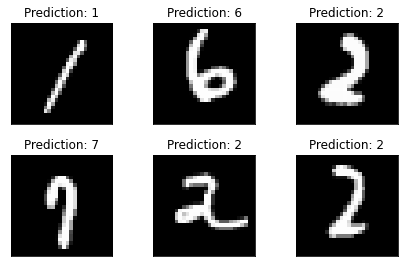

Confusion matrix, without normalization


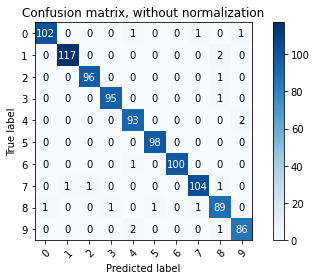

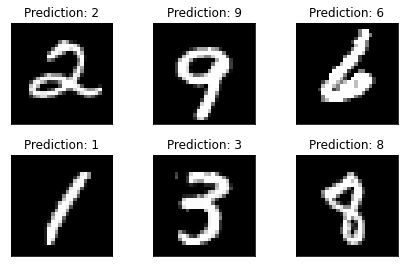

Confusion matrix, without normalization


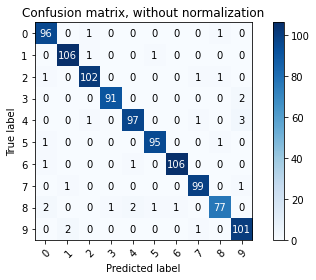

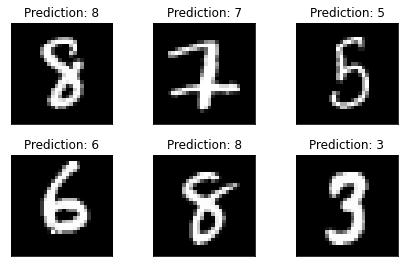

Confusion matrix, without normalization


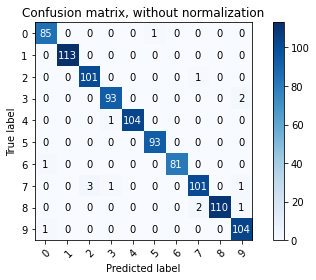

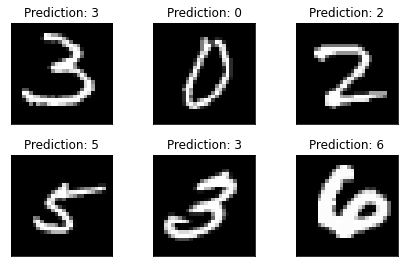

Confusion matrix, without normalization


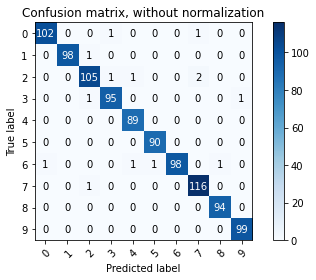

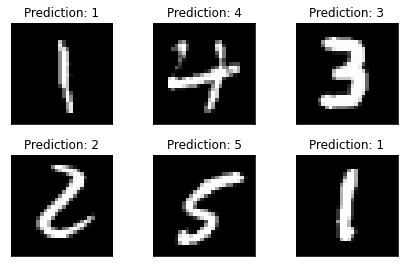

Confusion matrix, without normalization


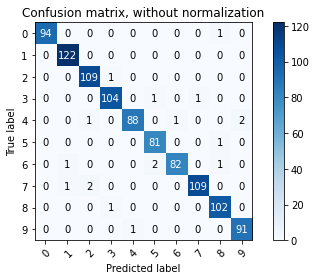

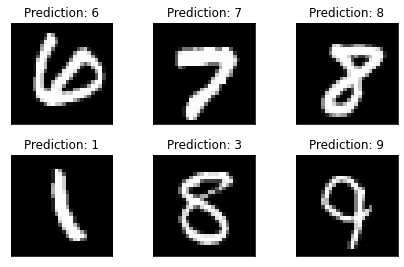

Confusion matrix, without normalization


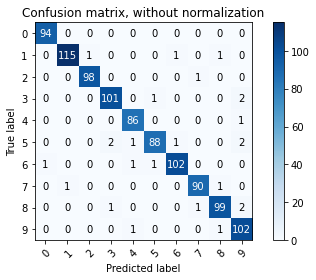

In [17]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def predict(test_loader):
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            output = model(data.view(data.size(0), -1))
            fig = plt.figure()
            for i in range(6):
                plt.subplot(2,3,i+1)
                plt.tight_layout()
                plt.imshow(data[i][0], cmap='gray', interpolation='none')
                plt.title("Prediction: {}".format( output.data.max(1, keepdim=True)[1][i].item()))
                plt.xticks([])
                plt.yticks([])
            plt.show(fig)
            y_true = target
            y_pred = output.data.max(1, keepdim=True)[1].view(-1)
            plot_confusion_matrix(y_true, y_pred, [0,1,2,3,4,5,6,7,8,9])
            
predict(test_loader)